<a href="https://colab.research.google.com/github/arshdeep-gif/Bluebikes-Demand-Forecasting-with-Weather-and-MBTA-Proximity-for-Operational-Planning-/blob/main/PROJECT_M2_Q3_ARSHDEEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Code Trends, Quantified: Mapping the Programming Language Ecosystem**


***Section:** B1*

***Team:** 14*

**Team Members:**  Arshdeep Singh Oberoi, Ahrar Karim, Vishesh Goyal, Drishti Chulani


***Link to Proposal Notebook (BA820_Team_14_Project_Proposal_Notebook.ipynb):** https://colab.research.google.com/drive/1irElxdNYp_Hh08p4MeOGdafvt_d1KsT7?usp=sharing*

**Link to Colab Notebook (EDA Primary Dataset)**:https://colab.research.google.com/drive/1KR8Z4ZS2_CrUe3nTaPI5AWtBwOZ6QDQn?usp=sharing

**Link to Colab Notebook (EDA Backup Dataset):** https://colab.research.google.com/drive/1hv-sx-c6sdlDacv2ooOj7u4S3TcMz_Yb?usp=sharing

**Primary Dataset**:https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-03-21

**Backup Dataset**: https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-02-21

**Link to Github Repo**:https://github.com/BackBencher2424/BA820_Team_14_Project

##**STEP 1 – IMPORT LIBRARIES**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from IPython.display import display


##**Loading Dataset**

In [5]:
path = "/content/languages.csv"
df = pd.read_csv(path) # Loads the primary dataset to the runtime

##**2. Preprocessing**

###Standerdizing and Exploring the Dataset

In [6]:
df.columns = [c.strip().lower() for c in df.columns] # Standerdizes the columns, strip() —->> removes any trailing or leading spaces, lower() -->> makes all the column names lowercase


In [7]:
print("Shape (rows, cols):", df.shape) #Gives number of Rows and Columns

Shape (rows, cols): (4303, 49)


In [8]:
df.head(10) # Gives the first 10 entries of the dataset

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN
5,cpp,C++,NaN,pl,1985,Bjarne Stroustrup,http://isocpp.org/,isocpp.org,2012.0,NaN,...,NaN,NaN,//,2022,4128238,61098,Bell Labs,0.0,text,NaN
6,html,HTML,NaN,textMarkup,1991,Tim Berners-Lee,NaN,NaN,NaN,NaN,...,False,False,NaN,2022,5570873,69531,Conseil Européen pour la Recherche Nucléaire,0.0,text,NaN
7,xml,XML,NaN,dataNotation,1996,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,2022,1917452,42277,NaN,0.0,text,NaN
8,php,PHP,NaN,pl,1995,Rasmus Lerdorf,https://php.net,php.net,1997.0,http://php.net/manual/en/reserved.keywords.php,...,False,True,//,2022,2356101,30349,Zend,NaN,text,NaN
9,perl,Perl,NaN,pl,1987,Larry Wall,https://www.perl.org,perl.org,1995.0,NaN,...,False,True,#,2022,491984,13482,Unisys,NaN,text,NaN


In [9]:
df.info() # Gives Data types + non-null counts of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   pldb_id                            4303 non-null   object 
 1   title                              4303 non-null   object 
 2   description                        823 non-null    object 
 3   type                               4303 non-null   object 
 4   appeared                           4303 non-null   int64  
 5   creators                           1100 non-null   object 
 6   website                            1375 non-null   object 
 7   domain_name                        715 non-null    object 
 8   domain_name_registered             502 non-null    float64
 9   reference                          1989 non-null   object 
 10  isbndb                             1086 non-null   float64
 11  book_count                         4303 non-null   int64

##**3. Exploratory Data Analysis (EDA)**

###**Calculating Missing & Duplicate Values**

We can't drop any columns based on null values because programming languages have been updated and invented quite a lot and most of them have either some or the other missing information, so we work with the missing values.

In [10]:
# Missing values summary gives columns missing_count and missing_pct

missing = (df.isna().sum()
           .to_frame("missing_count")
           .assign(missing_pct=lambda x: (x["missing_count"] / len(df) * 100).round(2))
           .sort_values("missing_pct", ascending=False))

missing.head(20)  # top 20 columns with most missingness

,missing_count,missing_pct
github_language_ace_mode,3838,89.19
github_language_tm_scope,3837,89.17
github_language_type,3837,89.17
github_language_file_extensions,3833,89.08
github_language_repos,3833,89.08
line_comment_token,3831,89.03
github_language,3829,88.98
domain_name_registered,3801,88.33
is_open_source,3792,88.12
features_has_line_comments,3765,87.50


In [11]:
# Number of completely duplicated rows
dup_rows = df.duplicated().sum()
print("Duplicate rows:", dup_rows)

# 'pldb_id' is supposed to be unique, hence we are checking duplicates using the feature as well, just to double check
if "pldb_id" in df.columns:
    dup_ids = df["pldb_id"].duplicated().sum()
    print("Duplicate pldb_id values:", dup_ids)

Duplicate rows: 0
Duplicate pldb_id values: 0


##**Type Conversion**

In [12]:
df_eda = df.copy()

# Converting year-like columns to numeric (coerce invalid values to NaN)
for col in ["appeared", "wikipedia_appeared", "last_activity", "language_rank"]:
    if col in df_eda.columns:
        df_eda[col] = pd.to_numeric(df_eda[col], errors="coerce")

# Converting GitHub numeric columns
github_num_cols = [
    "github_repo_stars", "github_repo_forks", "github_repo_subscribers",
    "github_repo_issues", "github_language_repos",
    "wikipedia_daily_page_views", "wikipedia_backlinks_count", "wikipedia_revision_count",
    "book_count", "central_package_repository_count",
    "number_of_users", "number_of_jobs"
]
for col in github_num_cols:
    if col in df_eda.columns:
        df_eda[col] = pd.to_numeric(df_eda[col], errors="coerce")

# Parsing date columns
date_cols = ["github_repo_updated", "github_repo_created", "github_repo_first_commit", "wikipedia_created"]
for col in date_cols:
    if col in df_eda.columns:
        df_eda[col] = pd.to_datetime(df_eda[col], errors="coerce")

# Converting obvious boolean-like columns
bool_cols = [c for c in df_eda.columns if c.startswith("features_")] + ["is_open_source"]
for col in bool_cols:
    if col in df_eda.columns:
        # Some columns might be True/False already; others may be NaN
        df_eda[col] = df_eda[col].astype("boolean")

df_eda.dtypes.head(10)

,0
pldb_id,object
title,object
description,object
type,object
appeared,int64
creators,object
website,object
domain_name,object
domain_name_registered,float64
reference,object


##**Numeric Summary Statistics**

In [13]:
# Basic summary statistics for selected numeric columns, because these are most relevant columns
cols_to_summarize = [
    "appeared", "last_activity", "language_rank",
    "github_repo_stars", "github_repo_forks",
    "wikipedia_daily_page_views",
    "number_of_users", "number_of_jobs",
    "central_package_repository_count"
]
cols_to_summarize = [c for c in cols_to_summarize if c in df_eda.columns]

df_eda[cols_to_summarize].describe().T

,count,mean,std,min,25%,50%,75%,max
appeared,4303.0,1991.105275,111.443382,-2000.0,1984.00,1997.0,2012.0,2023.0
last_activity,4303.0,2000.616082,84.597760,-900.0,1992.00,2006.0,2021.0,2023.0
language_rank,4303.0,2151.000000,1242.313433,0.0,1075.50,2151.0,3226.5,4302.0
github_repo_stars,889.0,2127.402700,7554.016422,0.0,29.00,194.0,1071.0,88526.0
github_repo_forks,886.0,261.286682,1203.002760,0.0,2.25,16.0,91.5,23732.0
wikipedia_daily_page_views,1466.0,227.133015,783.552400,-1.0,9.00,24.0,99.0,13394.0
number_of_users,4303.0,13771.264467,227712.946798,0.0,0.00,20.0,230.0,7179119.0
number_of_jobs,4303.0,422.183825,12572.985441,0.0,0.00,0.0,0.0,771996.0
central_package_repository_count,2821.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


#**Plots**

##Plot 1: When languages first appeared (year)

**Dropping rows that appeared before 1544**

This is because the data that we want to drop are making the data skewed and hence they can be considered as outliers

In [14]:
# Dropping the rows where appeared <= 1544 (including 1544 and earlier)
# Keeping only rows where appeared is NaN OR appeared > 1544
df_eda = df_eda[(df_eda["appeared"].isna()) | (df_eda["appeared"] > 1544)].copy()

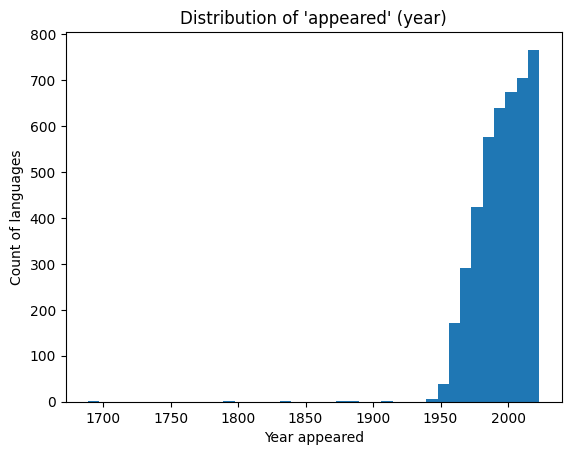

In [15]:
if "appeared" in df_eda.columns:
    series = df_eda["appeared"].dropna().astype(int)
    plt.figure()
    plt.hist(series, bins=40)
    plt.title("Distribution of 'appeared' (year)")
    plt.xlabel("Year appeared")
    plt.ylabel("Count of languages")
    plt.show()


##**Plot 2: GitHub stars (log-scale is helpful because stars are very skewed)**

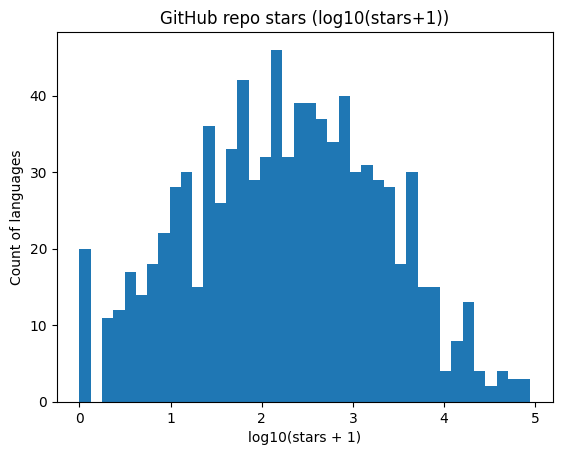

In [16]:
if "github_repo_stars" in df_eda.columns:
    stars = df_eda["github_repo_stars"].dropna()
    plt.figure()
    plt.hist(np.log10(stars + 1), bins=40)
    plt.title("GitHub repo stars (log10(stars+1))")
    plt.xlabel("log10(stars + 1)")
    plt.ylabel("Count of languages")
    plt.show()

##**Plot 3: Wikipedia daily page views (also skewed)**

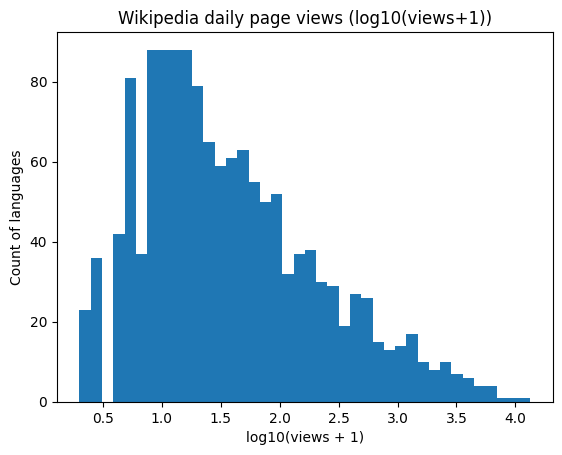

Dropped invalid/NaN views: 2889


In [17]:
if "wikipedia_daily_page_views" in df_eda.columns:
    # 1) Keep only numeric and non-missing
    views = pd.to_numeric(df_eda["wikipedia_daily_page_views"], errors="coerce").dropna()

    # 2) Remove invalid values for log10(x+1): we need x > -1
    views = views[views > -1]

    # 3) Log transform and keep only finite results (removes -inf/+inf)
    log_views = np.log10(views + 1)
    log_views = log_views[np.isfinite(log_views)]

    plt.figure()
    plt.hist(log_views, bins=40)
    plt.title("Wikipedia daily page views (log10(views+1))")
    plt.xlabel("log10(views + 1)")
    plt.ylabel("Count of languages")
    plt.show()

    print("Dropped invalid/NaN views:", len(df_eda) - len(views))

##**Plot 4: Top language types**

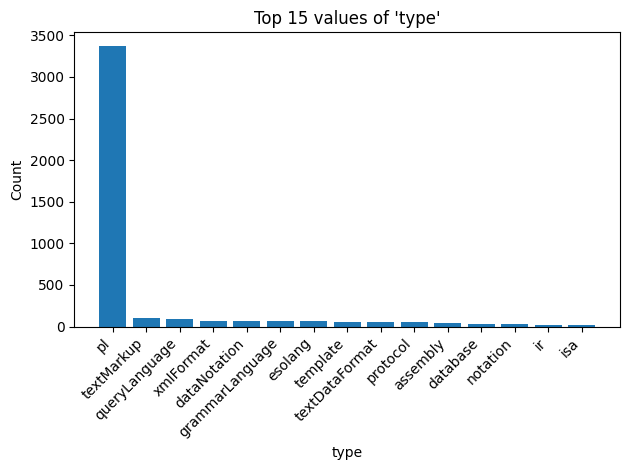

In [18]:
if "type" in df_eda.columns:
    counts = df_eda["type"].value_counts().head(15)
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title("Top 15 values of 'type'")
    plt.xlabel("type")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


##**Plot 5: Relationship Jobs vs Users**

X-axis (number_of_users) is on the scale 10^6 and hence, There are two outliers HTTP (jobs=771996, users=33780) and SQL (jobs=219617, users=7179119)

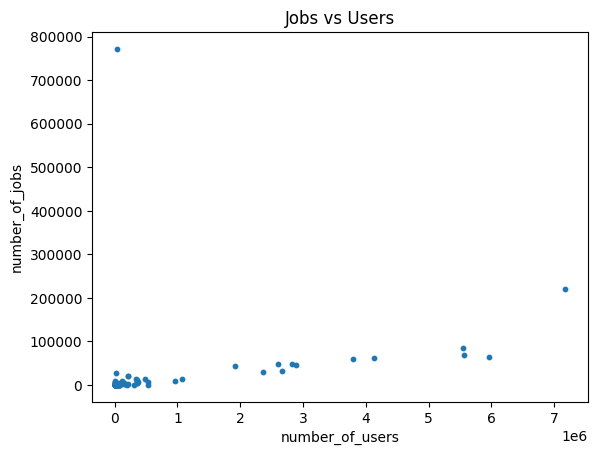

In [19]:
# Scatter: number_of_users vs number_of_jobs
if set(["number_of_users", "number_of_jobs"]).issubset(df_eda.columns):
    tmp = df_eda[["number_of_users", "number_of_jobs"]].dropna()
    plt.figure()
    plt.scatter(tmp["number_of_users"], tmp["number_of_jobs"], s=10)
    plt.title("Jobs vs Users")
    plt.xlabel("number_of_users")
    plt.ylabel("number_of_jobs")
    plt.show()

##**Plot 6: Relationship GitHub stars vs Wikipedia views**

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


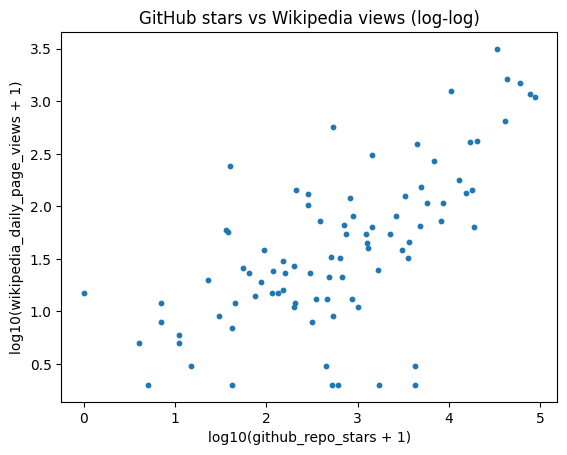

In [20]:
# Scatter (log scale): GitHub stars vs Wikipedia views
if set(["github_repo_stars", "wikipedia_daily_page_views"]).issubset(df_eda.columns):
    tmp = df_eda[["github_repo_stars", "wikipedia_daily_page_views", "title"]].dropna()
    x = np.log10(tmp["github_repo_stars"] + 1)
    y = np.log10(tmp["wikipedia_daily_page_views"] + 1)

    plt.figure()
    plt.scatter(x, y, s=10)
    plt.title("GitHub stars vs Wikipedia views (log-log)")
    plt.xlabel("log10(github_repo_stars + 1)")
    plt.ylabel("log10(wikipedia_daily_page_views + 1)")
    plt.show()

    # Show the top 10 by stars to connect points to real languages
    top10 = tmp.sort_values("github_repo_stars", ascending=False).head(10)[["title", "github_repo_stars", "wikipedia_daily_page_views"]]
    top10

#**Correlations**

In [21]:

# Correlation matrix for a small set of numeric columns
num_cols = [
    "github_repo_stars", "github_repo_forks", "github_repo_subscribers",
    "wikipedia_daily_page_views", "wikipedia_backlinks_count",
    "number_of_users", "number_of_jobs"
]
num_cols = [c for c in num_cols if c in df_eda.columns]
corr = df_eda[num_cols].corr(numeric_only=True)
corr


,github_repo_stars,github_repo_forks,github_repo_subscribers,wikipedia_daily_page_views,wikipedia_backlinks_count,number_of_users,number_of_jobs
github_repo_stars,1.000000,0.842264,0.892564,0.589823,0.283119,0.375530,0.293965
github_repo_forks,0.842264,1.000000,0.928575,0.494591,0.321279,0.439711,0.406260
github_repo_subscribers,0.892564,0.928575,1.000000,0.644099,0.370503,0.474368,0.428320
wikipedia_daily_page_views,0.589823,0.494591,0.644099,1.000000,0.413102,0.453071,0.342182
wikipedia_backlinks_count,0.283119,0.321279,0.370503,0.413102,1.000000,0.431046,0.147825
number_of_users,0.375530,0.439711,0.474368,0.453071,0.431046,1.000000,0.324025
number_of_jobs,0.293965,0.406260,0.428320,0.342182,0.147825,0.324025,1.000000


##**Correlations Pairplot**

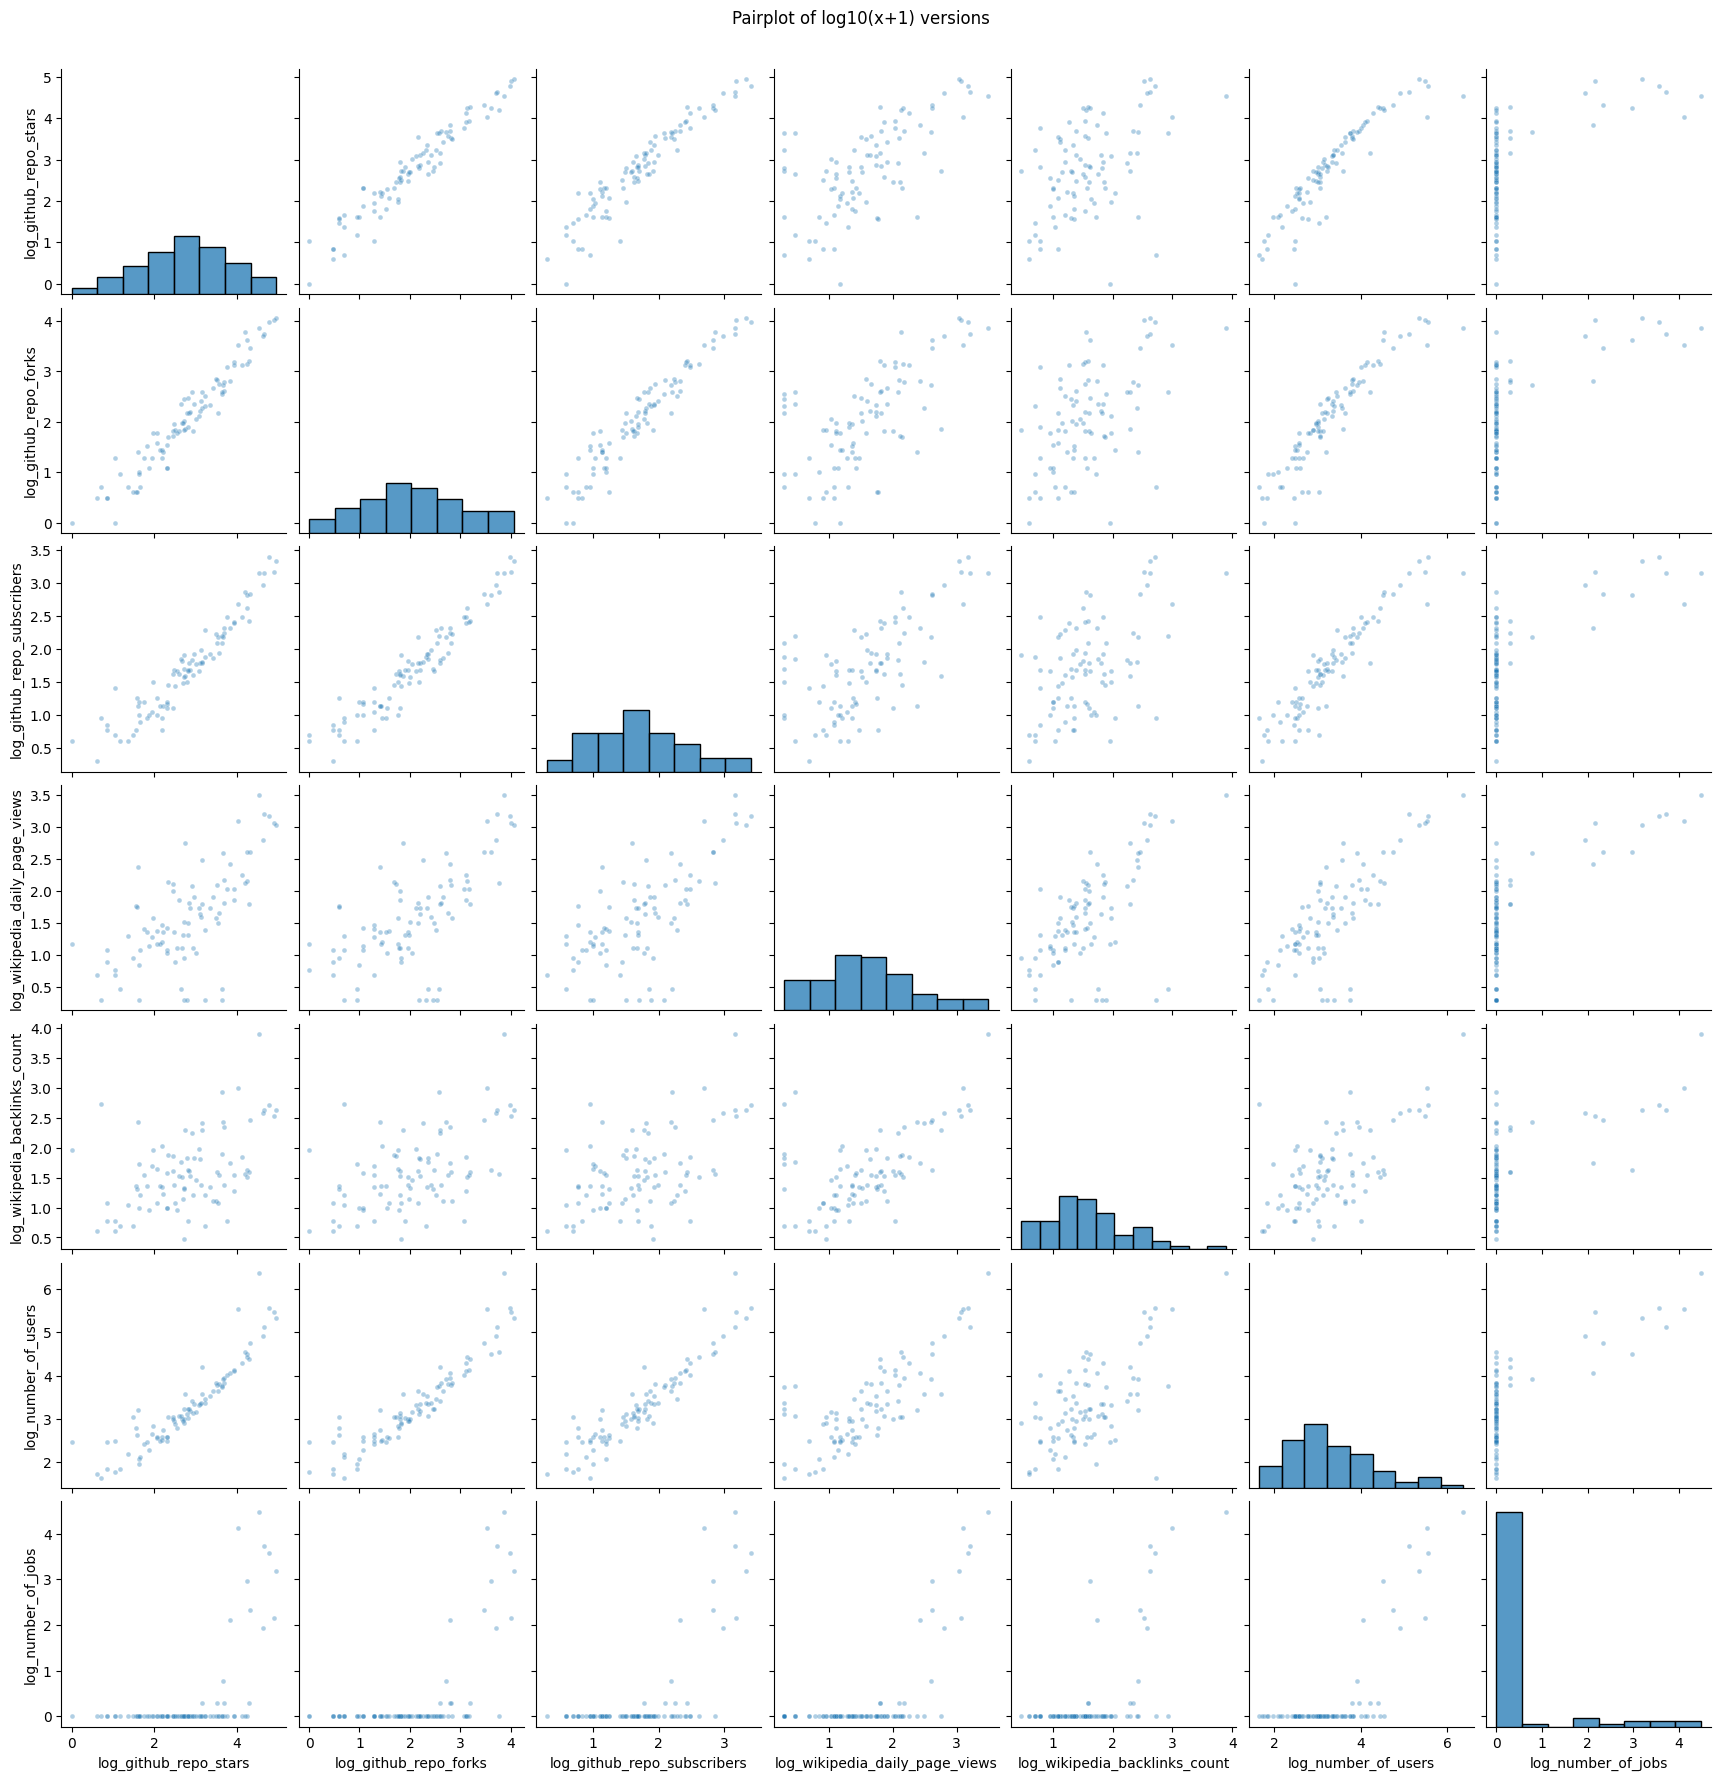

In [22]:
# Make a copy with only these columns, numeric-safe
pair_df = df_eda[num_cols].apply(pd.to_numeric, errors="coerce").copy()

# Add log columns (recommended because these are very skewed)
for c in num_cols:
    # log10(x+1) requires x >= 0, so set negatives to NaN
    safe = pair_df[c].where(pair_df[c] >= 0, np.nan)
    pair_df[f"log_{c}"] = np.log10(safe + 1)

# Choose what you want to plot:
# Option A: plot the log columns only (usually best)
plot_cols = [f"log_{c}" for c in num_cols]

# Drop rows with missing values in the plotted columns
plot_df = pair_df[plot_cols].dropna()

sns.pairplot(
    plot_df,
    diag_kind="hist",
    plot_kws={"s": 12, "alpha": 0.35}
)
plt.suptitle("Pairplot of log10(x+1) versions", y=1.02)
plt.show()

#**Text EDA**

In [23]:

# Select the three columns that have strig values
text_cols = [c for c in ["description", "wikipedia_summary", "github_repo_description"] if c in df_eda.columns]

# For each column we select -> drop missing -> check if the content is all string -> get the length of the string
for col in text_cols:
    lengths = df_eda[col].dropna().astype(str).str.len()
    # we get the number of non-null rows, avg no of characters (mean_length), middle length (median_length)
    print(f"{col}: non-null={lengths.shape[0]}, mean_len={lengths.mean():.1f}, median_len={lengths.median():.1f}\n")

description: non-null=820, mean_len=238.9, median_len=165.0

wikipedia_summary: non-null=1415, mean_len=837.9, median_len=672.0

github_repo_description: non-null=865, mean_len=60.5, median_len=49.0



#**Plot for Text Comparison**

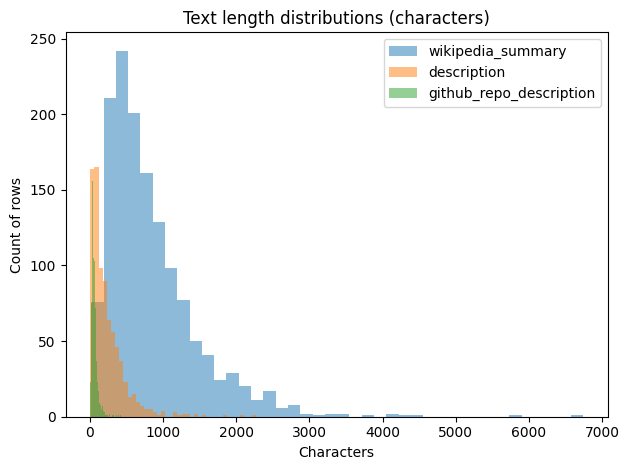

In [24]:
# Get character lengths (drop missing)
ws_len   = df_eda["wikipedia_summary"].astype("string").str.len().dropna()
desc_len = df_eda["description"].astype("string").str.len().dropna()
gh_len   = df_eda["github_repo_description"].astype("string").str.len().dropna()

bins = 40  # adjust if you want more/less detail

plt.figure()
plt.hist(ws_len,   bins=bins, alpha=0.5, label="wikipedia_summary")
plt.hist(desc_len, bins=bins, alpha=0.5, label="description")
plt.hist(gh_len,   bins=bins, alpha=0.5, label="github_repo_description")

plt.title("Text length distributions (characters)")
plt.xlabel("Characters")
plt.ylabel("Count of rows")
plt.legend()
plt.tight_layout()
plt.show()

#**4. Insights**

After analyzing the languages.csv dataset, we uncovered five insights that challenge the typical narrative of "popular" programming. Here is what the data actually says about the history and state of code.

###1. **The "Job Market" Plot Twist: Protocols Over Syntax**

**The Finding**: If you look for the skill with the most job openings, you won't find Java or Python at the top. The winner is HTTP (771,996 jobs), followed by SQL.

**The Takeaway**: This was a massive surprise. It reminds us that our dataset defines "language" broadly. More importantly, it signals that companies are desperate for engineers who understand the infrastructure of the web (how data moves) even more than they value knowledge of a specific syntax. "Knowing how the internet works" is the ultimate employability hack.

###2. **The Unsung Architect: Niklaus Wirth**

**The Finding:** While names like James Gosling (Java) and Guido van Rossum (Python) dominate the headlines, the most prolific creator in this dataset is Niklaus Wirth. He is credited with 8 different languages, including influential heavyweights like Pascal, Modula-2, and Oberon.

**The Takeaway:** We often view languages as "one-hit wonders" defined by a single creator. Wirth’s presence shows that language design can be a career-long discipline. He didn't just write code; he shaped the structural philosophy of programming for decades.

###3.**A 4,000-Year Timeline**

**The Finding**: This isn't just a history of computers; it's a history of logic. The dataset spans over 4,000 years, stretching from Babylonian Numerals (~2000 BC) all the way to modern languages created in 2023 (like TQL).

**The Takeaway**: It is fascinating that the dataset treats mathematical notations (like Binary and Balanced Ternary) as ancestors to modern code. It blurs the line between "counting" and "coding," proving that humans were developing algorithms on clay tablets long before we put them on silicon.

###4. **SQL is the "Lingua Franca"**
**The Finding:** Despite the immense hype around Python and JavaScript, SQL holds the crown for the highest number of users (about 7.1 million). It significantly outperforms JavaScript (about 5.9M) and Java (about 5.5M).

**The Takeaway:** SQL is the quiet giant of the tech world. While developers fight over which backend language is best, almost all of them agree on one thing: they need to talk to a database. SQL isn't just a language; it’s a universal secondary skill required for virtually every data and development role.

###5. **The "Long Tail" of Specialization**

**The Finding**: While 78% of the dataset is made up of standard "Programming Languages" (pl), there is a thriving ecosystem of specialized tools: 97 text markups, 94 query languages, and 69 XML formats.

**The Takeaway**: We tend to think of coding as just writing logic loops. However, the sheer volume of "query languages" highlights how specialized the industry has become. It’s no longer just about creating data; a huge portion of the language ecosystem is dedicated solely to retrieving and structuring it.

#**Few More Key Findings (includes new tables and plots)**

##**What are the top 10 programming languages that have the most number of jobs?**

In [25]:
# Top 10 Languages by Jobs
print("Top 10 by Jobs:\n", df_eda[['title', 'number_of_jobs']].nlargest(10, 'number_of_jobs'))

Top 10 by Jobs:
          title  number_of_jobs
38        HTTP          771996
4          SQL          219617
0         Java           85206
6         HTML           69531
1   JavaScript           63993
5          C++           61098
2            C           59919
13       MySQL           47466
3       Python           46976
15         CSS           45617


##**What are the top 10 programming languages that have the most number of users?**

In [26]:
# Top 10 by Users
print("\nTop 10 by Users:\n", df_eda[['title', 'number_of_users']].nlargest(10, 'number_of_users'))


Top 10 by Users:
          title  number_of_users
4          SQL          7179119
1   JavaScript          5962666
6         HTML          5570873
0         Java          5550123
5          C++          4128238
2            C          3793768
15         CSS          2881846
3       Python          2818037
10      MATLAB          2661579
13       MySQL          2608362


##**Who invented the programming language?**

After the EDA one interesting fact that we analysed was that the programming languages are developed by individuals and not organisations, and Niklaus Wirth has created the most number of languages.

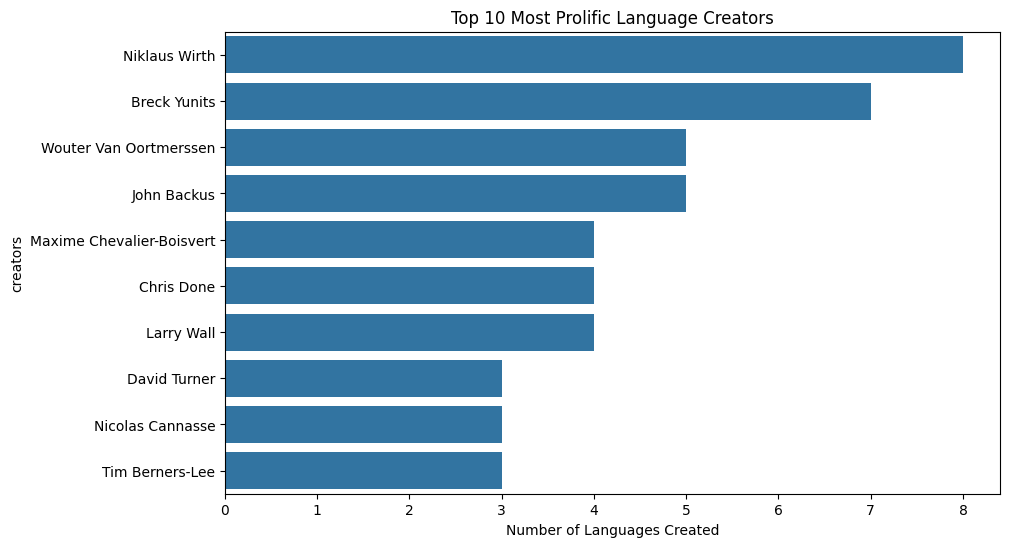

In [27]:
# Split the comma-separated creators and count them
creators_series = df_eda['creators'].dropna().str.split(',').explode().str.strip()
top_creators = creators_series.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_creators.values, y=top_creators.index)
plt.title('Top 10 Most Prolific Language Creators')
plt.xlabel('Number of Languages Created')
plt.show()

##**Who owns the Programming Language?**

Through the EDA phase we conluded that most (88.6%) of the programming languages are open sourced while still a significant number (11.4%) of languages are Proprietary Languages

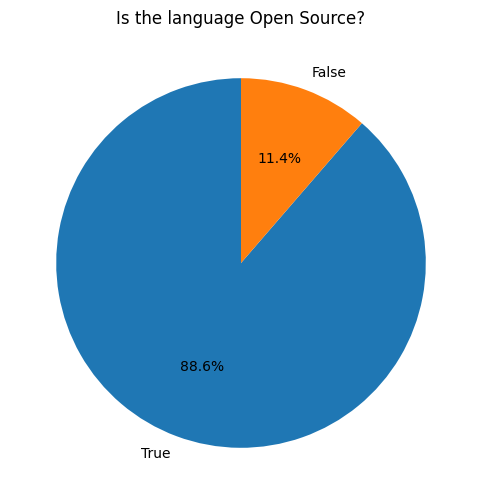

In [28]:
if 'is_open_source' in df_eda.columns:
    plt.figure(figsize=(6, 6))
    df_eda['is_open_source'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Is the language Open Source?')
    plt.ylabel('')
    plt.show()

#**M2**

##**Ghost Language Detection**

##Q4. CAN WE DETECT "GHOST LANGUAGE" TECHNOLOGIES WITH SIGNIFICANT CULTURAL VISIBILITY(HIGH WIKIPEDIA VIEWS AND RANKING) BUT VIRTUALLY NO REAL EMPLOYMENT ECOSYSTEM?

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


###**FEATURE SELECTION**

In [30]:
features = df[[
    "wikipedia_daily_page_views",
    "github_repo_stars",
    "github_repo_forks",
    "github_language_repos",
    "language_rank",
    "number_of_jobs",
    "number_of_users"
]].fillna(0)


Features for cultural visibility, such as views of Wikipedia, activity on GitHub, and ranking, along with those for employment ecosystems like jobs and users, have been chosen to study the concept of “Ghost Languages.”

###**NORMALIZE THE FEATURES**

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


Standardization was applied so that all variables contribute equally to the clustering process and are not dominated by large-scale features such as page views.

###**FIND OPTIMAL NUMBER OF CLUSTERS**

In [32]:
from sklearn.metrics import silhouette_score

scores = []
K = range(2, 8)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    scores.append(score)

    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.47445742949264375
Silhouette Score for k=3: 0.5017204733566425
Silhouette Score for k=4: 0.5233499876623592
Silhouette Score for k=5: 0.5304726320714893
Silhouette Score for k=6: 0.5446901028005724
Silhouette Score for k=7: 0.547164177601381


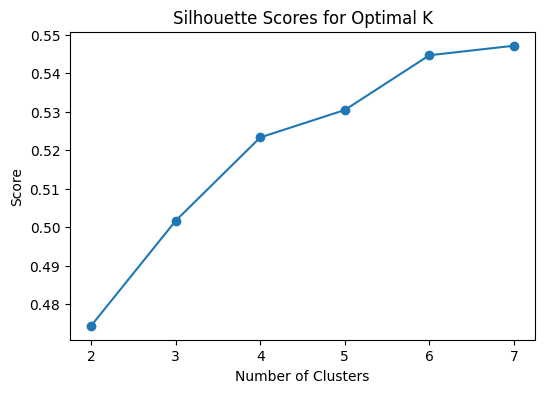

In [33]:
scores = []
K = range(2, 8)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K, scores, marker='o')
plt.title("Silhouette Scores for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

Silhouette analysis was used to determine how many natural groupings exist in the data. The number of clusters with the highest silhouette score was selected for final modeling.

#**APPLY FINAL K-MEANS CLUSTERING**

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

df[["title", "cluster"]].head()


,title,cluster
0,Java,2
1,JavaScript,2
2,C,2
3,Python,2
4,SQL,2


Each language was assigned to a cluster based on combined visibility and employment characteristics.

#**PCA VISUALIZATION OF CLUSTERS**

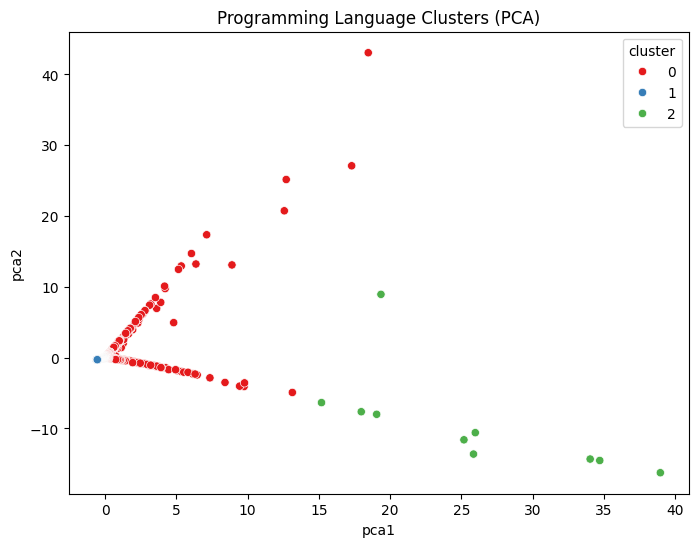

In [35]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["pca1"] = pca_result[:, 0]
df["pca2"] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df, palette="Set1")
plt.title("Programming Language Clusters (PCA)")
plt.show()


PCA was used to reduce dimensionality for visualization. The resulting plot shows distinct groupings of languages with similar profiles.

#**CREATE GHOST LANGUAGE METRICS**

In [36]:
df["visibility_score"] = (
    df["wikipedia_daily_page_views"].fillna(0) +
    df["github_repo_stars"].fillna(0) +
    df["github_repo_forks"].fillna(0) +
    df["github_language_repos"].fillna(0)
)

df[["title", "visibility_score"]].head()


,title,visibility_score
0,Java,11535222.0
1,JavaScript,16050753.0
2,C,2166539.0
3,Python,9307929.0
4,SQL,4306.0


A composite visibility score was developed to quantify the overall attention of programming languages regarding cultural and developer attention. It sums up Wikipedia page views and several GitHub engagement indicators, such as stars, forks, and repository counts. Missing values were filled in with zero so that all the languages can be compared uniformly. Higher scores show languages with significant online interest and community activity.

##**CREATE EMPLOYMENT SCORE**

In [37]:
df["employment_score"] = (
    df["number_of_jobs"].fillna(0) +
    df["number_of_users"].fillna(0)
)

df[["title", "employment_score"]].head()


,title,employment_score
0,Java,5635329
1,JavaScript,6026659
2,C,3853687
3,Python,2865013
4,SQL,7398736


An employment score is created to represent the practical economic adoption. This score is based on the job postings and estimated users for a language. Higher the employment score, more is the practical demand and usage; on the other hand, a low employment score depicts a low job market relevance.

##**COMPARE THE TWO METRICS**

In [38]:
df[["title", "visibility_score", "employment_score"]].describe()


,visibility_score,employment_score
count,4.303000e+03,4.303000e+03
mean,2.210296e+04,1.419345e+04
std,4.102750e+05,2.320919e+05
min,-1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.000000e+00,2.000000e+01
75%,8.400000e+01,2.300000e+02
max,1.605075e+07,7.398736e+06


Descriptive statistics can also be examined to understand the distribution of visibility and employment by language.
     Descriptive statistics can also be examined to understand the distribution of visibility and employment by language.

#**IDENTIFY GHOST LANGUAGES**

In [39]:
ghost_languages = df[
    (df["visibility_score"] > df["visibility_score"].mean()) &
    (df["employment_score"] < df["employment_score"].median())
]

ghost_languages[["title", "visibility_score", "employment_score", "cluster"]]


,title,visibility_score,employment_score,cluster
839,TI Program,1586478.0,0,0
996,Module Management System,222790.0,0,0


Ghost Languages were defined as languages with ranks greater than average but less than median. This filtering process immediately resonates with the research question posed. Clearly, there is a direct attempt here to arrive at a set of technologies that have a strong presence online but a weaker job market.

#**VISUALIZE GHOST LANGUAGES**

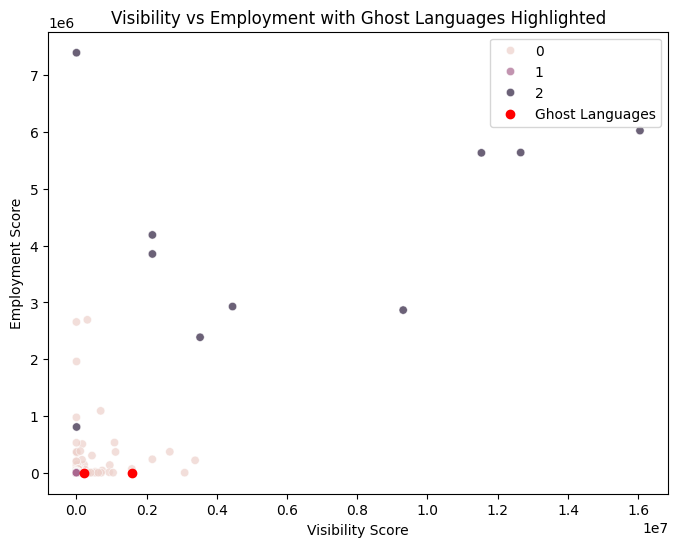

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=df["visibility_score"],
    y=df["employment_score"],
    hue=df["cluster"],
    alpha=0.7
)

plt.scatter(
    ghost_languages["visibility_score"],
    ghost_languages["employment_score"],
    color="red",
    label="Ghost Languages"
)

plt.title("Visibility vs Employment with Ghost Languages Highlighted")
plt.xlabel("Visibility Score")
plt.ylabel("Employment Score")
plt.legend()
plt.show()


##**PROFILE BY CLUSTER**

In [41]:
df.groupby("cluster")[["visibility_score", "employment_score"]].mean()


,visibility_score,employment_score
cluster,,
0,1.641514e+04,9.552104e+03
1,1.668326e+01,9.536564e+00
2,6.186334e+06,4.172885e+06


#**OVERALL INTERPRETATION**

The research successfully identified groups of what might be called "Ghost Languages," where programming languages receive considerable online attention but limited actual job requirements. By developing a system of scores to determine both actual visible job opportunity and the actual employment score for different languages, it has clearly demonstrated a disconnect between cultural significance and actual job opportunity through the use of clustering. This method also has the characteristics of a clear means of separating actual job opportunity from those evidenced by actual discussion and community support.